In [ ]:
%pip install pandas

import pandas as pd

#AVERAGE SALARY PER SECTOR = DF_1
#TOP 5 SECTORS IN TERMS OF AV SALARY = DF_2

# Specify the path to your CSV file
file_path_1 = r"C:\Users\User\Documents\Iron Hack\Week 5\WORKING FILE\Hypothesis 3 SQL Tables\Average Salary per Sector.csv"  # Replace with the actual path to your file

# Read the CSV file into a DataFrame
df_1 = pd.read_csv(file_path_1)



Note: you may need to restart the kernel to use updated packages.
                      sector  average_salary
0  Biotech & Pharmaceuticals          111.77
1                  Insurance          105.94
2                    Finance           97.37
3     Information Technology          112.99
4              Manufacturing           84.23


In [6]:
# Display the DataFrame to confirm successful import
print(df_1)

                                sector  average_salary
0            Biotech & Pharmaceuticals          111.77
1                            Insurance          105.94
2                              Finance           97.37
3               Information Technology          112.99
4                        Manufacturing           84.23
5                               Retail          107.08
6                          Real Estate          106.50
7                    Business Services           98.13
8                   Telecommunications          131.50
9                  Aerospace & Defense           99.06
10                         Health Care           67.62
11        Oil, Gas, Energy & Utilities           80.46
12                               Media          116.67
13          Transportation & Logistics           99.31
14                     Mining & Metals          104.00
15                          Government           78.55
16                           Education          100.74
17        

In [3]:
# Specify the path to your CSV file
file_path_2 = r"C:\Users\User\Documents\Iron Hack\Week 5\WORKING FILE\Hypothesis 3 SQL Tables\Top Five Sectors for Average Salary.csv"  # Replace with the actual path to your file

# Read the CSV file into a DataFrame
df_2 = pd.read_csv(file_path_2)

# Display the first few rows of the DataFrame to confirm successful import
print(df_2.head())

                      sector  average_salary
0         Telecommunications          131.50
1                      Media          116.67
2         Accounting & Legal          113.50
3     Information Technology          112.99
4  Biotech & Pharmaceuticals          111.77


C:\Users\User\AppData\Local\Temp\ipykernel_16448\3512803348.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_1, x='sector', y='average_salary', ci=None, palette='muted')
C:\Users\User\AppData\Local\Temp\ipykernel_16448\3512803348.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_1, x='sector', y='average_salary', ci=None, palette='muted')


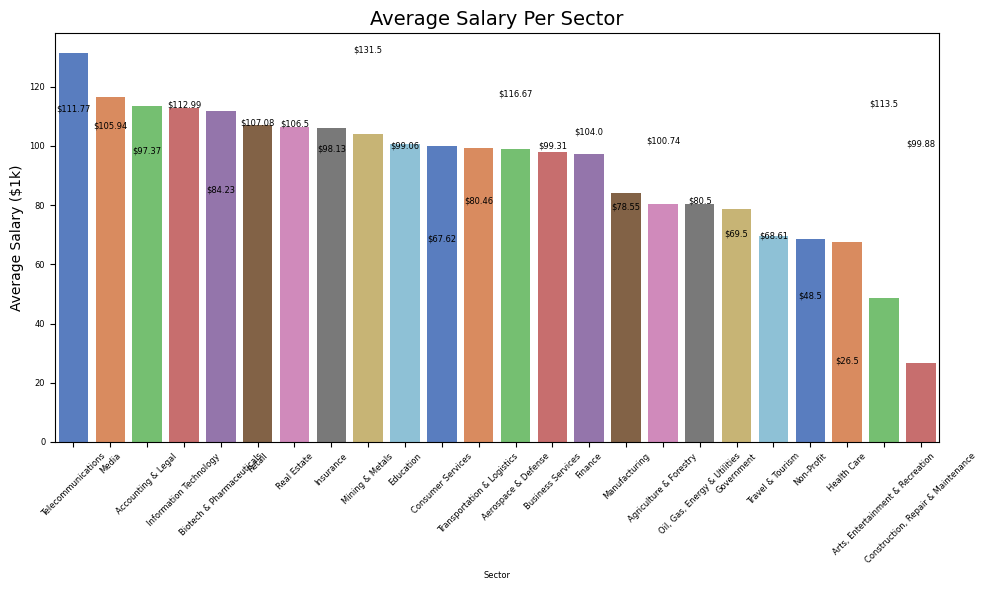

In [35]:
#1. Average Salary Per Sector:
#A. Bar Plot with Error Bars:


import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by average_salary in descending order
df_1 = df_1.sort_values(by='average_salary', ascending=False)

# Calculate the rank of each sector based on average salary
df_1['rank'] = df_1['average_salary'].rank(ascending=False, method='min')
finance_rank = df_1[df_1['sector'] == 'Finance']['rank'].values[0]

# Bar plot with error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=df_1, x='sector', y='average_salary', ci=None, palette='muted')
plt.title('Average Salary Per Sector')
plt.ylabel('Average Salary ($1k)')
plt.xticks(rotation=60)


# Decrease font size
plt.title('Average Salary Per Sector', fontsize=14)
plt.xlabel('Sector', fontsize=6)
plt.ylabel('Average Salary ($1k)', fontsize=10)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)

# Add value labels on the bars
for index, row in df_1.iterrows():
    plt.text(
        index, 
        row.average_salary, 
        f"${row.average_salary:,}", 
        color='black', 
        ha="center", 
        fontsize=6
    )

plt.tight_layout()
plt.show()

In [36]:
# Extract and print the rank of Finance sector
finance_rank = df_1[df_1['sector'] == 'Finance']['rank'].values[0]
print(f"The rank of the Finance sector based on average salary is: {int(finance_rank)}")

The rank of the Finance sector based on average salary is: 15


C:\Users\User\AppData\Local\Temp\ipykernel_16448\2884156623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_1, x='sector', y='average_salary', palette='muted')


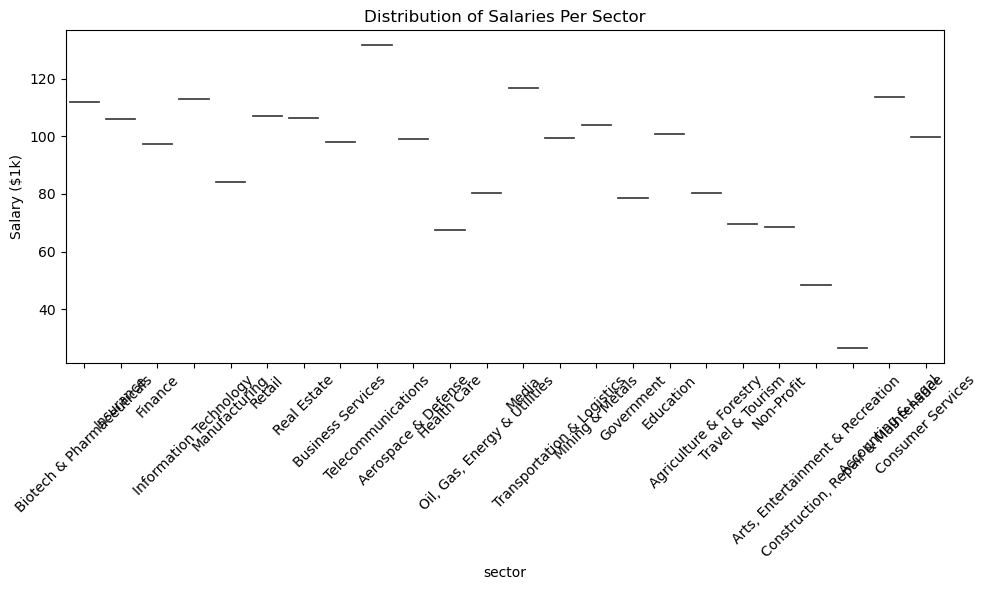

In [11]:
# Violin plot to show distribution per sector
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_1, x='sector', y='average_salary', palette='muted')
plt.title('Distribution of Salaries Per Sector')
plt.ylabel('Salary ($1k)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

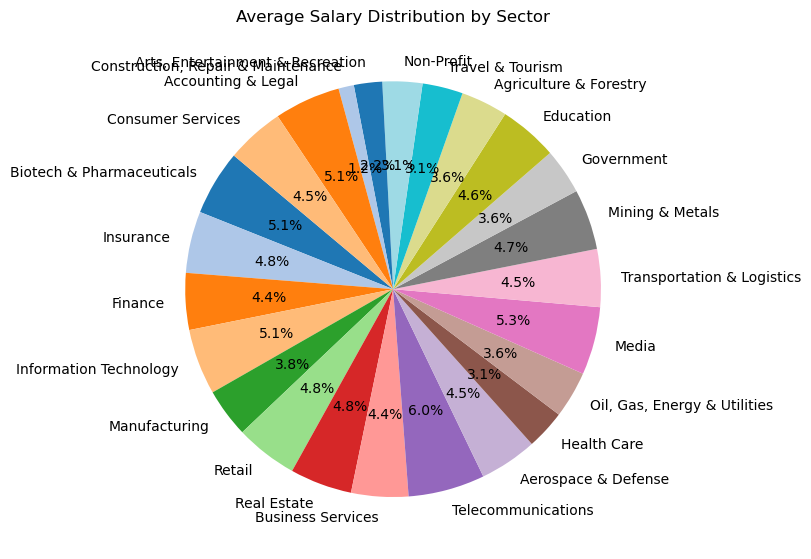

In [19]:

# Pie chart for average salary distribution
plt.figure(figsize=(8, 8))
plt.pie(
    df_1['average_salary'],
    labels=df_1['sector'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Average Salary Distribution by Sector')
plt.tight_layout()
plt.show()

In [17]:
import plotly.express as px


C:\Users\User\AppData\Local\Temp\ipykernel_16448\3805734457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


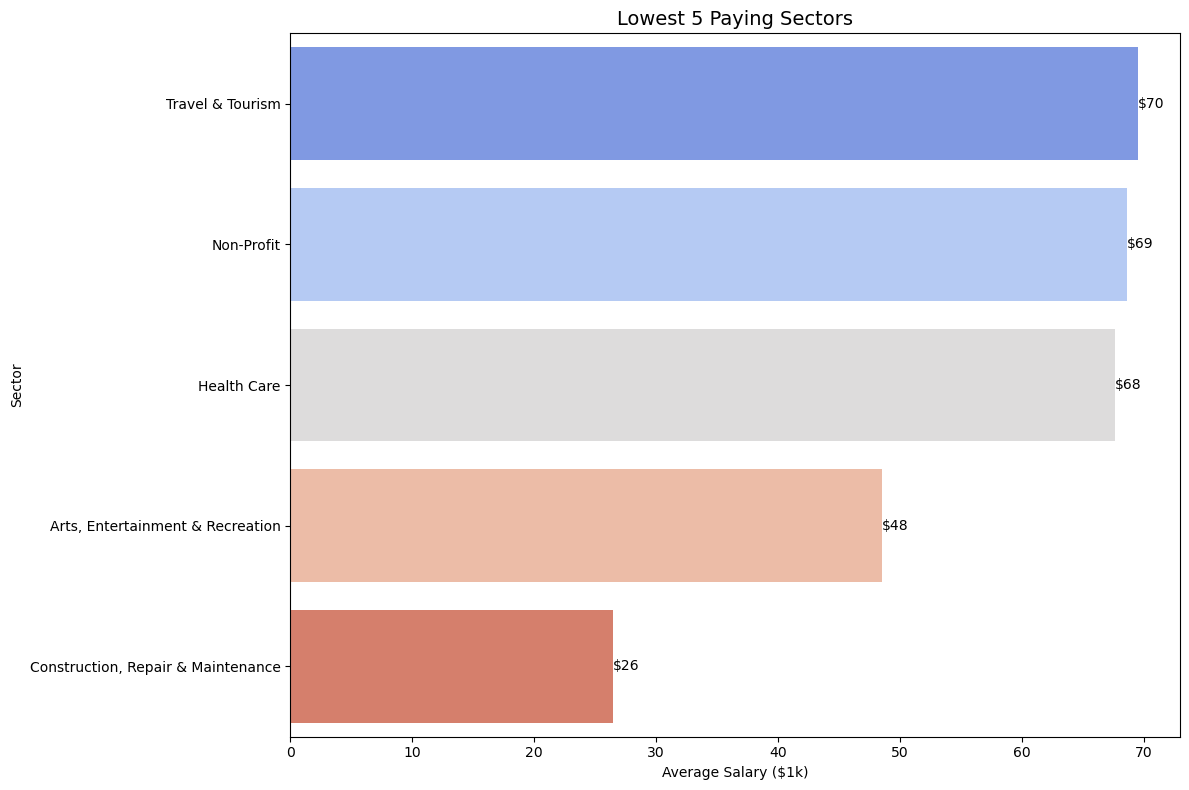

In [45]:


# Sort the DataFrame by average_salary to identify top and bottom sectors
sorted_df_1 = df_1.sort_values(by='average_salary', ascending=False)

# Concatenate top 5 and bottom 5 sectors into a new DataFrame for visualization
lowest_df_1 = sorted_df_1.tail(5)

# Initialize the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=lowest_df_1, 
    y='sector', 
    x='average_salary', 
    palette='coolwarm'
)
plt.title('Lowest 5 Paying Sectors', fontsize=14)
plt.xlabel('Average Salary ($1k)')
plt.ylabel('Sector')

# Add value labels
for index, value in enumerate(lowest_df_1['average_salary']):
    plt.text(value, index, f"${value:,.0f}", va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [44]:
132/26

5.076923076923077

In [18]:

# Creating a sunburst chart
fig = px.sunburst(
    df_1,
    path=['sector', 'subcategory'],
    values='average_salary',
    color='average_salary',
    color_continuous_scale='RdBu',
    title='Average Salary by Sector and Subcategory'
)

fig.show()

ValueError: Value of 'path_1' is not the name of a column in 'data_frame'. Expected one of ['sector', 'average_salary'] but received: subcategory

C:\Users\User\AppData\Local\Temp\ipykernel_16448\4075250233.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sectors, y='sector', x='average_salary', palette='coolwarm')


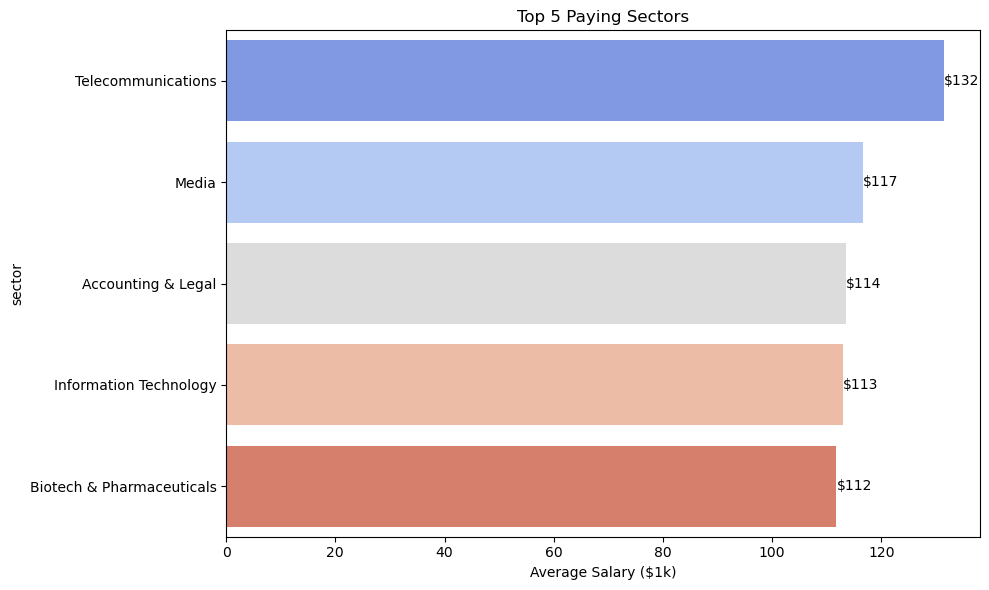

In [39]:
#2. Top Five Paying Sectors:
# A. Horizontal Bar Plot:

# Sorted data based on average salary for demonstration
top_sectors = df_2.sort_values('average_salary', ascending=False).head(5)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sectors, y='sector', x='average_salary', palette='coolwarm')
plt.title('Top 5 Paying Sectors')
plt.xlabel('Average Salary ($1k)')

# Add value labels to bars
for index, value in enumerate(top_sectors['average_salary']):
    plt.text(value, index, f"${value:,.0f}", va='center', ha='left', fontsize=10, color='black')


plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16448\2980186484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2, x='sector', y='average_salary', palette='coolwarm')


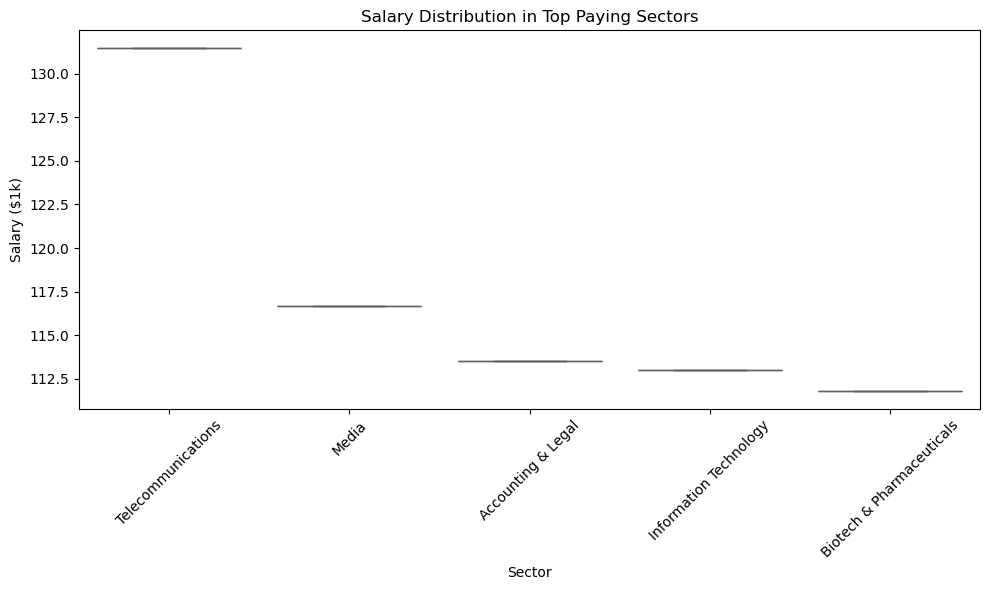

In [14]:
#B. Box Plot:
# Box plot for top sectors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2, x='sector', y='average_salary', palette='coolwarm')
plt.title('Salary Distribution in Top Paying Sectors')
plt.ylabel('Salary ($1k)')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()